In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [11]:
# Importing the dataset
dataset = pd.read_csv('Desktop/Datasets/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # First column is not taken since it is just verbal representation of the second column, second column is taken instead.
y = dataset.iloc[:, -1].values

In [12]:
# Filling the empty values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])

In [16]:
# Splitting the dataset to train and test sets
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
# Training Simple Linear Regression model on the Training Set
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, Y_train)

LinearRegression()

In [29]:
# Predicting the Test set results
y_pred = lin_regressor.predict(x_test)

In [93]:
# Training the polynomial model on the whole dataset
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X) # Returns the matrix [x, x^2]
lin_regressor2 = LinearRegression()
lin_regressor2.fit(X_poly,y)

LinearRegression()

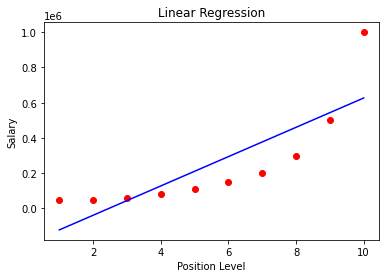

In [103]:
# Visualizing the results for Linear Regression
plt.scatter(X, y, color = 'red') # X axis, Y axis, color
plt.plot(X, lin_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

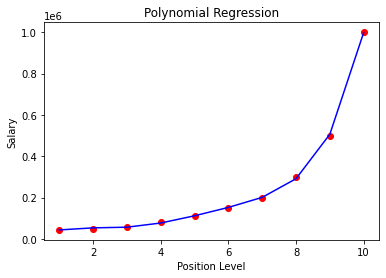

In [104]:
# Visualizing the results for Polynomial Regression
plt.scatter(X, y, color = 'red') # X axis, Y axis, color
plt.plot(X, lin_regressor2.predict(X_poly), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [105]:
# Predicting a new result in linear regression model
lin_regressor.predict([[6.5]])

array([335474.55968689])

In [107]:
#Predicting a new result in polynomial regression model
lin_regressor2.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765173])